In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
file = "../Resources/police_reports_clean.csv"

police_reports = pd.read_csv(file)
police_reports

,Incident Datetime,Incident Date,Incident Year,Incident Day of Week,Report Datetime,Report Type Description,Filed Online,Incident Category,Incident Subcategory,Incident Description,Resolution,Intersection,Police District,Analysis Neighborhood,Latitude,Longitude,Incident Time,Report Time,Report Date
0,2021-08-03 10:00:00,2021-08-03,2021,Tuesday,2021-08-15 15:40:00,Initial,False,Fraud,Fraud,Fraudulent Use Of Automated Teller Card,Open or Active,04TH ST \ HOWARD ST,Southern,Financial District/South Beach,37.783259,-122.402708,10:00:00,15:40:00,2021-08-15
1,2021-11-23 07:38:00,2021-11-23,2021,Tuesday,2021-11-23 11:14:00,Initial,False,Arson,Arson,Arson,Open or Active,FILLMORE ST \ PAGE ST,Northern,Hayes Valley,37.773039,-122.430629,07:38:00,11:14:00,2021-11-23
2,2018-03-16 19:45:00,2018-03-16,2018,Friday,2018-03-16 23:30:00,Initial,False,Assault,Simple Assault,Battery,Open or Active,JONES ST \ POST ST,Central,Tenderloin,37.787664,-122.413354,19:45:00,23:30:00,2018-03-16
3,2019-09-03 08:25:00,2019-09-03,2019,Tuesday,2019-09-04 14:53:00,Initial,False,Lost Property,Lost Property,Lost Property,Open or Active,07TH ST \ BRANNAN ST,Southern,South of Market,37.773051,-122.403205,08:25:00,14:53:00,2019-09-04
4,2020-01-01 00:00:00,2020-01-01,2020,Wednesday,2021-06-23 13:49:00,Initial,False,Fraud,Fraud,"False Claims, Presenting to Government",Open or Active,47TH AVE \ WAWONA ST,Taraval,Sunset/Parkside,37.736135,-122.505297,00:00:00,13:49:00,2021-06-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411293,2021-05-19 15:00:00,2021-05-19,2021,Wednesday,2021-05-20 07:09:00,Vehicle Initial,False,Motor Vehicle Theft,Motor Vehicle Theft,"Vehicle, Stolen & Recovered",Open or Active,SANTIAGO ST \ 24TH AVE,Taraval,Sunset/Parkside,37.744681,-122.481181,15:00:00,07:09:00,2021-05-20
411294,2021-11-22 09:00:00,2021-11-22,2021,Monday,2021-11-24 13:29:00,Initial,False,Malicious Mischief,Vandalism,"Malicious Mischief, Vandalism to Vehicle",Open or Active,TAYLOR ST \ SACRAMENTO ST,Central,Nob Hill,37.792552,-122.412650,09:00:00,13:29:00,2021-11-24
411295,2021-08-13 00:10:00,2021-08-13,2021,Friday,2021-08-13 03:15:00,Initial,False,Non-Criminal,Non-Criminal,Found Property,Open or Active,TAYLOR ST \ POST ST,Central,Nob Hill,37.787872,-122.411699,00:10:00,03:15:00,2021-08-13
411296,2021-05-19 11:30:00,2021-05-19,2021,Wednesday,2021-05-19 11:36:00,Initial,False,Other Miscellaneous,Other,Investigative Detention,Open or Active,SELBY ST \ QUESADA AVE,Bayview,Bayview Hunters Point,37.738649,-122.400808,11:30:00,11:36:00,2021-05-19


In [3]:
police_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411298 entries, 0 to 411297
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Incident Datetime        411298 non-null  object 
 1   Incident Date            411298 non-null  object 
 2   Incident Year            411298 non-null  int64  
 3   Incident Day of Week     411298 non-null  object 
 4   Report Datetime          411298 non-null  object 
 5   Report Type Description  411298 non-null  object 
 6   Filed Online             411298 non-null  bool   
 7   Incident Category        411298 non-null  object 
 8   Incident Subcategory     411298 non-null  object 
 9   Incident Description     411298 non-null  object 
 10  Resolution               411298 non-null  object 
 11  Intersection             411298 non-null  object 
 12  Police District          411298 non-null  object 
 13  Analysis Neighborhood    411298 non-null  object 
 14  Lati

In [4]:
# changing data types
police_reports["Incident Datetime"] = pd.to_datetime(police_reports["Incident Datetime"])
police_reports["Report Datetime"] = pd.to_datetime(police_reports["Report Datetime"])


In [5]:
police_reports["Incident Time"] = police_reports["Incident Datetime"].dt.time
police_reports["Report Time"] = police_reports["Report Datetime"].dt.time

police_reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411298 entries, 0 to 411297
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Incident Datetime        411298 non-null  datetime64[ns]
 1   Incident Date            411298 non-null  object        
 2   Incident Year            411298 non-null  int64         
 3   Incident Day of Week     411298 non-null  object        
 4   Report Datetime          411298 non-null  datetime64[ns]
 5   Report Type Description  411298 non-null  object        
 6   Filed Online             411298 non-null  bool          
 7   Incident Category        411298 non-null  object        
 8   Incident Subcategory     411298 non-null  object        
 9   Incident Description     411298 non-null  object        
 10  Resolution               411298 non-null  object        
 11  Intersection             411298 non-null  object        
 12  Police District 

In [6]:
# df showing incident reports prior to 2023
incident_report_no2023 = police_reports.loc[police_reports["Incident Year"]<2023]
# incident_report_no2023

In [7]:
# shows the number of days tracked in the data set
num_days = police_reports["Incident Date"].nunique()
num_days

1826

In [8]:
crime_count = police_reports["Incident Category"].value_counts()
crime_count

Larceny Theft                               95830
Assault                                     34404
Burglary                                    32509
Motor Vehicle Theft                         30823
Malicious Mischief                          29519
Non-Criminal                                27568
Other Miscellaneous                         27155
Fraud                                       18908
Robbery                                     13073
Suspicious Activity                         12316
Missing Person                              11985
Disorderly Conduct                           9195
Warrant                                      7800
Offences Against The Family And Children     7690
Lost Property                                7289
Recovered Vehicle                            6204
Drug Offense                                 5750
Miscellaneous Investigation                  5563
Other                                        4586
Weapons Offense                              3472


In [9]:
# using a groupby to turn this into a readable data frame
crime_counts = police_reports.groupby(["Incident Category"]).count()["Incident Datetime"]
crime_counts

Incident Category
Arson                                        1436
Assault                                     34404
Burglary                                    32509
Case Closure                                 1812
Civil Sidewalks                               132
Courtesy Report                              1740
Disorderly Conduct                           9195
Drug Offense                                 5750
Drug Violation                                 72
Embezzlement                                  791
Fire Report                                   625
Forgery And Counterfeiting                   1725
Fraud                                       18908
Gambling                                       11
Homicide                                       36
Human Trafficking                             110
Larceny Theft                               95830
Liquor Laws                                    24
Lost Property                                7289
Malicious Mischief              

In [10]:
incident_category_count = pd.DataFrame(crime_counts)
incident_category_count = incident_category_count.sort_values("Incident Datetime", ascending=False)
incident_category_count

,Incident Datetime
Incident Category,
Larceny Theft,95830
Assault,34404
Burglary,32509
Motor Vehicle Theft,30823
Malicious Mischief,29519
Non-Criminal,27568
Other Miscellaneous,27155
Fraud,18908
Robbery,13073


In [11]:
subcategory_counts = police_reports["Incident Subcategory"].unique()
subcategory_counts

array(['Fraud', 'Arson', 'Simple Assault', 'Lost Property',
       'Missing Person', 'Other', 'Suspicious Occ',
       'Larceny - Auto Parts', 'Non-Criminal', 'Missing Adult',
       'Theft From Vehicle', 'Burglary - Residential', 'Trespass',
       'Fire Report', 'Suicide', 'Vandalism', 'Larceny - From Vehicle',
       'Intimidation', 'Burglary - Other', 'Robbery - Other',
       'Motor Vehicle Theft', 'Courtesy Report', 'Recovered Vehicle',
       'Rape', 'Robbery - Carjacking', 'Stalking', 'Case Closure',
       'Prostitution', 'Larceny Theft - Other',
       'Larceny Theft - Shoplifting', 'Burglary - Commercial',
       'Burglary - Hot Prowl', 'Aggravated Assault', 'Traffic Collision',
       'Warrant', 'Traffic Violation Arrest',
       'Larceny Theft - From Building', 'Robbery - Street', 'Sex Offense',
       'Drug Violation', 'Weapons Offense', 'Stolen Property',
       'Robbery - Commercial', 'Miscellaneous Investigation',
       'Larceny Theft - Bicycle', 'Other Offenses',
   

In [12]:
# may be useful information for future analysis
incident_type = police_reports["Report Type Description"].value_counts()
incident_type

Initial               334537
Vehicle Initial        38678
Initial Supplement     30172
Vehicle Supplement      7911
Name: Report Type Description, dtype: int64

In [13]:
num_days = police_reports["Incident Date"].nunique()
num_days

1826

In [14]:
police_districts = police_reports["Police District"].value_counts()
police_districts

Central       64553
Northern      52475
Mission       52102
Southern      50183
Bayview       38380
Ingleside     36274
Tenderloin    34952
Taraval       32676
Richmond      25251
Park          18998
Out of SF      5454
Name: Police District, dtype: int64

In [15]:
neighborhood = police_reports["Analysis Neighborhood"].value_counts()
neighborhood = pd.DataFrame(neighborhood)
neighborhood

,Analysis Neighborhood
Mission,43551
Tenderloin,36914
Financial District/South Beach,35342
South of Market,31370
Bayview Hunters Point,27596
Sunset/Parkside,13782
North Beach,13301
Western Addition,12451
Nob Hill,12137
Castro/Upper Market,12056


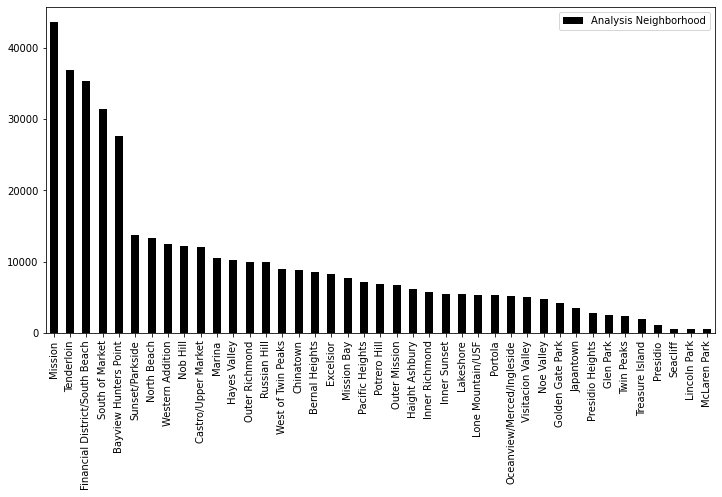

In [44]:
neighborhood.plot(kind = 'bar', figsize=(12,6), color='black')

plt.show()

In [47]:
select_neighborhoods = neighborhood.loc[neighborhood.index.isin(['Mission', 'Tenderloin', 'Financial District/South Beach', 'South of Market', 'Bayview Hunters Point'])]
# 'Mission', ' Tenderloin','Financial District/South Beach', 'South of Market', 'Bayview Hunters Point'
# 'Presidio Heights','Glen Park', 'Twin Peaks' 'Presidio','Seacliff'

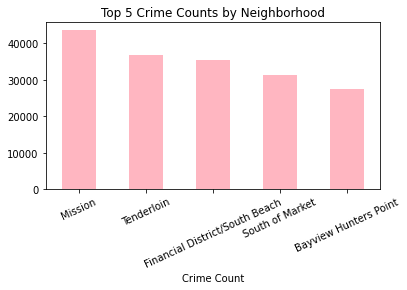

In [48]:
select_neighborhoods.plot(kind='bar', color = 'lightpink', legend=None)
plt.xticks(rotation=25)
plt.xlabel("Crime Count")
plt.title("Top 5 Crime Counts by Neighborhood")
plt.subplots_adjust(bottom=0.30)
plt.savefig("Output/top5neighborhoods.jpg")
plt.show()

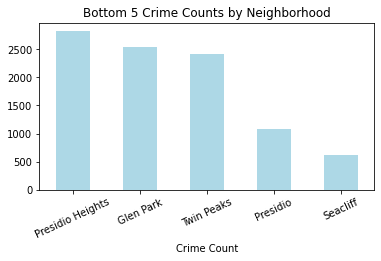

In [36]:
best_neighborhoods = neighborhood.loc[neighborhood.index.isin(['Presidio Heights','Glen Park', 'Twin Peaks', 'Presidio','Seacliff'])]
best_neighborhoods.plot(kind='bar', color = 'lightblue', legend=None)
plt.xticks(rotation=25)
plt.xlabel("Crime Count")
plt.title("Bottom 5 Crime Counts by Neighborhood")
plt.subplots_adjust(bottom=0.30)
plt.savefig("Output/bottom5neighborhoods.jpg")
plt.show()

In [ ]:
num_neighborhood = police_reports["Analysis Neighborhood"].nunique()
num_neighborhood

In [ ]:
resolution_count = police_reports["Resolution"].value_counts()
resolution_count

In [ ]:
# shows how long it took from the time the incident occurred to the time the report was filed
response_time = police_reports['Incident Datetime'] - police_reports['Report Datetime']
response_time

In [ ]:
police_reports["Response Time"] = response_time
police_reports

In [ ]:
police_reports.info()

In [ ]:
# # incident_dtypes = incident_reports.astype({'Analysis Neighborhood': str})
# police_dtypes = police_reports.astype({'Analysis Neighborhood': float})
# police_dtypes = police_reports.astype({'Response Time': int})

In [ ]:
# neighborhood_response = police_dtypes.groupby(police_dtypes['Analysis Neighborhood'].mean()["Response Time"])